# Kaggle - House prices competition

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Disabling warnings
import warnings
warnings.simplefilter("ignore")

#### Importing dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploring the TRAIN dataset

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

#### Checking null values

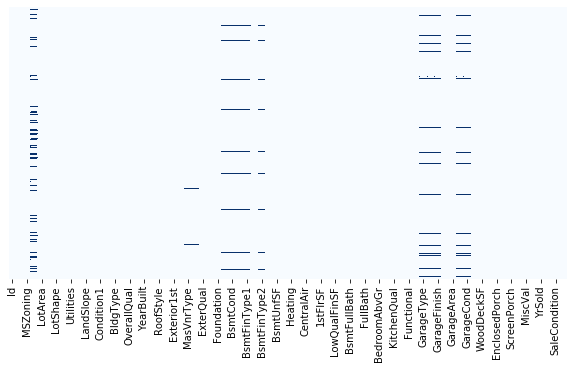

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

#### % of null values in each column

In [6]:
columns = train_df.columns
for i in columns:
    print(i, train_df[i].isnull().sum()*100/1460)

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 17.73972602739726
LotArea 0.0
Street 0.0
Alley 93.76712328767124
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.547945205479452
MasVnrArea 0.547945205479452
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinSF1 0.0
BsmtFinType2 2.6027397260273974
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0684931506849315
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 47.2602739

### Columns with high % of null values will be dropped

In [7]:
train_df.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)

## Fixing columns with null values

### LotFrontage, since it has 17% of null values and the type is float, the mean will be used to fill them.

In [18]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

### MasVnrType (Masonry veneer type) and MasVnrArea, have only 0.54% of null values, so I will fill them with the most common value, which is None (there is no MasVnr) therefore, MasVnrArea will be set to 0.

In [20]:
train_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

In [24]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0.0)

### Basement columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 have 2.5-2.6% of null values. I will fill them with the most frequent value

In [25]:
train_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [26]:
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('TA')

In [27]:
train_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [28]:
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('TA')

In [29]:
train_df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [30]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('No')

In [31]:
train_df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [32]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('Unf')

In [35]:
train_df['BsmtFinType2'].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [34]:
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('Unf')

### Electrical has only 0.06% of null values, I will fill them with the most frequent value

In [38]:
train_df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')

### Garage related columns have 5.54% of null values. I will fill them with the most frequent value

In [39]:
train_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [40]:
train_df['GarageType'] = train_df['GarageType'].fillna('Attchd')

In [43]:
train_df['GarageYrBlt'].dtype

dtype('float64')

In [44]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

In [46]:
train_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [47]:
train_df['GarageFinish'] = train_df['GarageFinish'].fillna('Unf')

In [48]:
train_df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [49]:
train_df['GarageQual'] = train_df['GarageQual'].fillna('TA')

In [50]:
train_df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [51]:
train_df['GarageCond'] = train_df['GarageCond'].fillna('TA')

### Checking null values map again

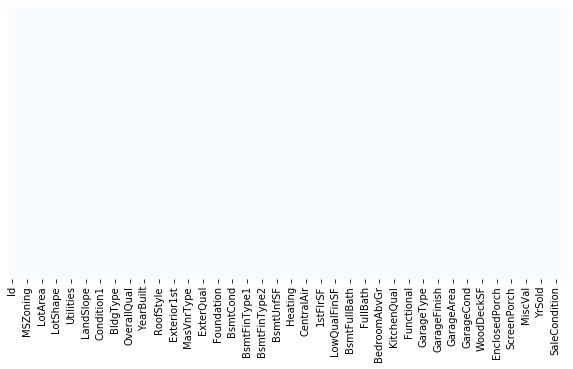

In [138]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar = False, yticklabels = False, cmap = 'Blues')

# There are no null values for the training set, the same has to be done to the test set

# Exploring the TEST dataset

In [63]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [60]:
test_df.shape

(1459, 75)

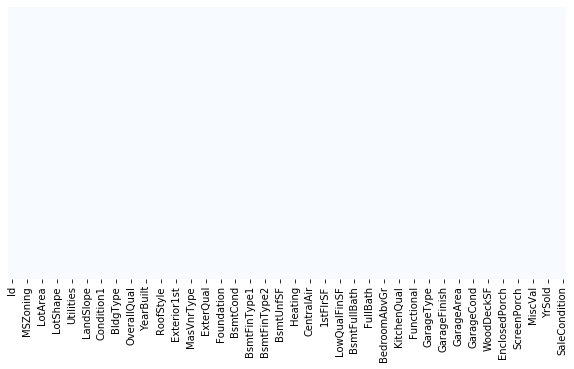

In [137]:
plt.figure(figsize = (10,5))
sns.heatmap(test_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [62]:
columns = test_df.columns
for i in columns:
    print(i, test_df[i].isnull().sum()*100/1459)

Id 0.0
MSSubClass 0.0
MSZoning 0.27416038382453733
LotFrontage 15.558601782042494
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.13708019191226867
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.06854009595613433
Exterior2nd 0.06854009595613433
MasVnrType 1.0966415352981493
MasVnrArea 1.0281014393420151
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 3.015764222069911
BsmtCond 3.0843043180260454
BsmtExposure 3.015764222069911
BsmtFinType1 2.8786840301576424
BsmtFinSF1 0.06854009595613433
BsmtFinType2 2.8786840301576424
BsmtFinSF2 0.06854009595613433
BsmtUnfSF 0.06854009595613433
TotalBsmtSF 0.06854009595613433
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.13708019191226867
BsmtHalfBath 0.13708019191226867
FullBath 0.0
HalfBath 0

### For the training set, I dropped some columns, the same has to be done in the test set
### Columns with high % of null values will be dropped

In [58]:
test_df.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)

## Fixing columns with null values

#### MSZoning has 0.27% of null values, I will fill them with the most common value

In [66]:
test_df['MSZoning'].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [65]:
test_df['MSZoning'] = test_df['MSZoning'].fillna('RL')

#### LotFrontage has 15.55% of null values, I will fill them with the mean value

In [73]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

#### Utilities has 0.13% of null values. Fill with most common

In [78]:
test_df['Utilities'].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

In [77]:
test_df['Utilities'] = test_df['Utilities'].fillna('AllPub')

#### Exterior1st and Exterior2nd have 0.06% of null values. Fill with most common

In [79]:
test_df['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [80]:
test_df['Exterior1st'] = test_df['Exterior1st'].fillna('VinylSd')

In [81]:
test_df['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [82]:
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna('VinylSd')

#### MasVnrType and MasVnrArea have around 1% of nulls, filling with most common and 0.

In [84]:
test_df['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [85]:
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')

In [87]:
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0.0)

### Basement related columns. They have around 0-3% of null values. They will be filled with mean or most frequent

In [88]:
test_df['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [89]:
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('TA')

In [90]:
test_df['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [91]:
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('TA')

In [92]:
test_df['BsmtExposure'].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [93]:
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('No')

In [94]:
test_df['BsmtFinType1'].value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [95]:
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('GLQ')

In [98]:
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())

In [100]:
test_df['BsmtFinType2'].value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [101]:
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('Unf')

In [104]:
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())

In [106]:
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())

In [108]:
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

In [110]:
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())

In [112]:
test_df['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [113]:
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(0.0)

#### KitchenQual 0.06% null values. Fill with most common

In [114]:
test_df['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [115]:
test_df['KitchenQual'] = test_df['KitchenQual'].fillna('TA')

### Functional 0.13% of null values. Fill with most common

In [118]:
test_df['Functional'].value_counts()

Typ     1359
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [117]:
test_df['Functional'] = test_df['Functional'].fillna('Typ')

#### Garage related columns 0-5% of nulls. Filling with most common or mean value

In [119]:
test_df['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [120]:
test_df['GarageType'] = test_df['GarageType'].fillna('Attchd')

In [121]:
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())

In [122]:
test_df['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [123]:
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('Unf')

In [125]:
test_df['GarageCars'].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [126]:
test_df['GarageCars'] = test_df['GarageCars'].fillna(2.0)

In [128]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [129]:
test_df['GarageQual'].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [130]:
test_df['GarageQual'] = test_df['GarageQual'].fillna('TA')

In [131]:
test_df['GarageCond'].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [132]:
test_df['GarageCond'] = test_df['GarageCond'].fillna('TA')

### SaleType 0.06 fill with most frequent value

In [133]:
test_df['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [134]:
test_df['SaleType'] = test_df['SaleType'].fillna('WD')

## Null values map

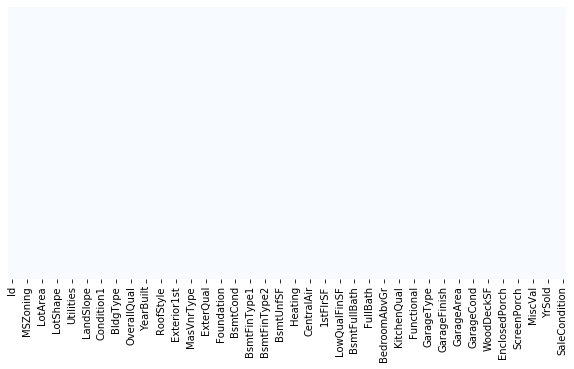

In [136]:
plt.figure(figsize = (10, 5))
sns.heatmap(test_df.isnull(), cbar = False, yticklabels = False, cmap = 'Blues')

# All null values were removed

### next step is to remove categorical variables

In [140]:
full_df = train_df.append(test_df, sort = False)
# train_df id 1-1460
# test_df id 1461 - 2919

In [141]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [149]:
full_df = pd.get_dummies(full_df)

In [150]:
full_df.shape

(2919, 272)

In [157]:
columns = full_df.columns
for c in columns:
    print(c)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neigh

## Removing dummy trap

In [159]:
full_df.drop(columns = ['MSZoning_FV', 'Street_Grvl', 'LotShape_IR1', 'LandContour_Bnk', 'Utilities_NoSeWa',
                       'LotConfig_Corner', 'LandSlope_Gtl', 'Neighborhood_Blmngtn', 'Condition1_Artery',
                       'Condition2_Artery', 'BldgType_1Fam', 'HouseStyle_1.5Fin', 'RoofStyle_Flat', 'RoofMatl_ClyTile',
                       'Exterior1st_AsbShng', 'Exterior2nd_AsbShng', 'MasVnrType_BrkCmn', 'ExterQual_Ex', 
                       'ExterCond_Ex', 'Foundation_BrkTil', 'BsmtQual_Ex', 'BsmtCond_Fa', 'BsmtExposure_Av',
                       'BsmtFinType1_ALQ', 'BsmtFinType2_ALQ', 'Heating_Floor', 'HeatingQC_Ex', 'CentralAir_N', 
                       'Electrical_FuseA', 'KitchenQual_Ex', 'Functional_Maj1', 'GarageType_2Types', 'GarageFinish_Fin',
                       'GarageQual_Gd', 'PavedDrive_N', 'SaleType_COD', 'SaleCondition_Family'], inplace = True)

In [163]:
train_df = full_df.iloc[0:1460]

In [167]:
test_df = full_df.iloc[1460:]

In [256]:
test_df.drop(columns = ['SalePrice'], inplace = True)

# Data pre-processing is done!

### Dividing the model to make a supervised learning

In [171]:
X = train_df.drop(columns = ['SalePrice'])
y =  train_df['SalePrice']

### Feature scaling

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Spliting the train data in train/test data

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Creating and training the Machine Learning models 

In [305]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100) # starting with default parameters
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [304]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [303]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[13:32:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Evaluation

In [226]:
from sklearn.metrics import mean_squared_error
import math 

rfr_error = mean_squared_error(y_test, rfr_pred)
svr_error = mean_squared_error(y_test, svr_pred)
xgb_error = mean_squared_error(y_test, xgb_pred)
print("Random Forest: {}\nSVR: {}\nXGB: {}".format( math.sqrt(rfr_error), math.sqrt(svr_error), math.sqrt(xgb_error)))

Random Forest: 30160.256762364806
SVR: 81930.83775715578
XGB: 30751.466689563957


## It looks like Random Forest and XGB are good regressors for this problem. I will chose Random Forest which had the best performance to do a parameter optimization

### RandomizedSearchCV

In [243]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
parameters = {'bootstrap' : [True, False],
              'criterion' : ['mse'],
              'max_features' : ['auto', 50, 100, 200],
              'n_estimators' : [10, 100, 200]
             }
RSCV = RandomizedSearchCV(estimator = rfr, param_distributions = parameters, n_iter = 100, cv = 3, n_jobs = -1)
RSCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None

In [231]:
RSCV.best_params_

{'n_estimators': 100,
 'max_features': 50,
 'criterion': 'mse',
 'bootstrap': False}

### Let's check the accuracy with these parameters 

In [232]:
rfr = RandomForestRegressor(n_estimators = 100, max_features = 50, 
                            criterion = 'mse', bootstrap = False) # Randomized Search Parameters round 1
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

rfr_error = mean_squared_error(y_test, rfr_pred)
print("Random Forest: {}".format( math.sqrt(rfr_error)))

Random Forest: 29658.71150594799


#### This model is slightly better. mse from 30160.256762364806 to 29658.71150594799

#### Randomized Search round 2

In [233]:
parameters = {'bootstrap' : [False],
              'criterion' : ['mse', 'mae'],
              'max_features' : [80, 100, 120],
              'n_estimators' : [80, 100, 120]
             }
RSCV = RandomizedSearchCV(estimator = rfr, param_distributions = parameters, n_iter = 100, cv = 3, n_jobs = -1)
RSCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=False,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=50,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None, v

In [234]:
RSCV.best_params_

{'n_estimators': 80,
 'max_features': 80,
 'criterion': 'mae',
 'bootstrap': False}

In [235]:
rfr = RandomForestRegressor(n_estimators = 80, max_features = 80, 
                            criterion = 'mae', bootstrap = False) # Randomized Search Parameters round 2
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

rfr_error = mean_squared_error(y_test, rfr_pred)
print("Random Forest: {}".format( math.sqrt(rfr_error)))

Random Forest: 28623.330259921247


### With the second round we could improve a little more, let's keep going

In [236]:
parameters = {'bootstrap' : [False],
              'criterion' : ['mae'],
              'max_features' : [50, 60, 80, 'sqrt', 'log2'],
              'n_estimators' : [50, 60, 80, 90]
             }
RSCV = RandomizedSearchCV(estimator = rfr, param_distributions = parameters, n_iter = 100, cv = 3, n_jobs = -1)
RSCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=False,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features=80,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=80, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None, ve

In [237]:
RSCV.best_params_

{'n_estimators': 80,
 'max_features': 50,
 'criterion': 'mae',
 'bootstrap': False}

In [238]:
rfr = RandomForestRegressor(n_estimators = 80, max_features = 50, 
                            criterion = 'mae', bootstrap = False) # Randomized Search Parameters round 3
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

rfr_error = mean_squared_error(y_test, rfr_pred)
print("Random Forest: {}".format( math.sqrt(rfr_error)))

Random Forest: 28989.649815694334


### There is no improvement, so let's stick with the round 2 parameters.

In [247]:
rfr = RandomForestRegressor(n_estimators = 80, max_features = 80, 
                            criterion = 'mae', bootstrap = False)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=None,
                      max_features=80, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### K-fold

In [308]:
kf = KFold(n_splits=5)
y_pred = cross_val_score(rfr, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.8464494113104453

#### Feature scaling

In [270]:
X_test_final = test_df
X_test_final = scaler.transform(X_test_final)

## Time for prediction

In [271]:
rfr_prediction = rfr.predict(X_test_final)

In [272]:
rfr_output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': rfr_prediction})

In [273]:
rfr_output.to_csv('rfr_output.csv', index = False)

## Random Forest didn't give a good score, so let's try using XGBoost

In [295]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[13:23:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [306]:
parameters = {'learning_rate' : [0.01, 0.05, 0.1],
              'n_estimators' : [100, 1000, 3000, 6000],
              'max_depth' : [3, 4, 5],
              'gamma' : [0, 0.3, 0.6],
              'subsample' : [1, 0.5, 0.7],
              'colsample_bytree': [1, 0.2, 0.5],
              'seed' : [None, 20, 30],
              'reg_alpha': [0, 0.00006]
             }
RSCV = RandomizedSearchCV(estimator = xgb, param_distributions = parameters, n_iter = 100, cv = 3, n_jobs = -1)
RSCV.fit(X_train, y_train)

[13:57:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [1, 0.2, 0.5],
                                        'gamma': [0, 0.3, 0.

In [307]:
RSCV.best_params_

{'subsample': 1,
 'seed': 20,
 'reg_alpha': 0,
 'n_estimators': 3000,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.6,
 'colsample_bytree': 0.2}

In [311]:
xgb = XGBRegressor( subsample= 1,
                    seed= 20,
                    reg_alpha= 0,
                    n_estimators= 3000,
                    max_depth= 4,
                    learning_rate= 0.05,
                    gamma= 0.6,
                    colsample_bytree= 0.2)

xgb.fit(X_train, y_train)
kf = KFold(n_splits=5)
y_pred = cross_val_score(rfr, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

[14:05:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8536484626505902

In [314]:
xgb_prediction = xgb.predict(X_test_final)
xgb_output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': xgb_prediction})
xgb_output.to_csv('xgb_output.csv', index = False)

# The XGB gave a good score of 0.12975